# Nextflow nf-core/rnaseq

[Nextflow](https://www.nextflow.io/) is a workflow management system used for executing scientific workflows across platforms scalably, portably, and reproducibly.

Here, we'll run `nf-core/rnaseq` to process `.fastq` files from bulk RNA sequencing using STAR, RSEM, HISAT2, Salmon with gene/isoform counts and extensive quality control ([reference](https://nf-co.re/rnaseq/3.12.0)).

![](https://raw.githubusercontent.com/nf-core/rnaseq/3.12.0//docs/images/nf-core-rnaseq_metro_map_grey.png)


```{note}

This notebook serves as a demo for Python scripting that you could run before and after Nextflow runs.

Typically, you'd run the workflows from the command line or Nextflow Tower.
```

## Setup

Let's create a test instance:

In [1]:
!lamin init --storage . --name nextflow-bulkrna

✅ saved: User(uid='I5DPZdiE', handle='zethson', updated_at=2023-12-06 11:09:01 UTC)
✅ saved: Storage(uid='pfjurGAu', root='/home/zeth/PycharmProjects/nextflow-lamin-usecases/docs', type='local', updated_at=2023-12-06 11:09:01 UTC, created_by_id=1)
💡 loaded instance: zethson/nextflow-bulkrna
💡 did not register local instance on hub


In [2]:
import lamindb as ln
from subprocess import getoutput

💡 lamindb instance: zethson/nextflow-bulkrna


## Download test data

Download test data using git:

In [3]:
!git clone https://github.com/nf-core/test-datasets --single-branch --branch rnaseq3 --depth 1

fatal: destination path 'test-datasets' already exists and is not an empty directory.


(Optional) Register input files:

In [4]:
# register files
sample_sheet = ln.File("test-datasets/samplesheet/v3.10/samplesheet_test.csv")
sample_sheet.save()
input_fastqs = ln.File.from_dir("test-datasets/testdata/GSE110004/")
ln.save(input_fastqs)

❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run & transform get linked, consider passing a `run` or calling ln.track()
❗ file has more than one suffix (path.suffixes), inferring: '.fastq.gz'
❗ no run

## Track the Nextflow run

Track the Nextflow workflow & run:

In [5]:
transform = ln.Transform(
    name="nf-core rnaseq",
    version="3.11.2",
    type="pipeline",
    reference="https://github.com/laminlabs/nextflow-lamin-usecases",
)
ln.track(transform)
# let's grab the run of the global run context
run = ln.dev.run_context.run

💡 saved: Transform(uid='A3xe64gBMC18zK', name='nf-core rnaseq', version='3.11.2', type='pipeline', reference='https://github.com/laminlabs/nextflow-lamin-usecases', updated_at=2023-12-06 11:09:03 UTC, created_by_id=1)
💡 saved: Run(uid='Bcs8m6VxzFM42qhCD4VF', run_at=2023-12-06 11:09:03 UTC, transform_id=1, created_by_id=1)


If we now stage input files, they'll be tracked as inputs for the global run:

In [6]:
input_sample_sheet_path = sample_sheet.stage()
input_paths = [input_fastq.stage() for input_fastq in input_fastqs]

Run the nextflow pipeline:

In [7]:
!nextflow run nf-core/rnaseq -r 3.11.2 -profile test,docker --outdir rna-seq-results -name "lamin_{run.uid}"

N E X T F L O W  ~  version 23.04.2
Launching `https://github.com/nf-core/rnaseq` [lamin_Bcs8m6VxzFM42qhCD4VF] DSL2 - revision: 5671b65af9 [3.11.2]


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/rnaseq v3.11.2-g5671b65
------------------------------------------------------
Core Nextflow options
  revision                  : 3.11.2
  runName                   : lamin_Bcs8m6VxzFM42qhCD4VF
  containerEngine           : docker
  launchDir                 : /home/zeth/PycharmProjects/nextflow-lamin-usecases/docs
  workDir                   : /home/zeth/PycharmProjects/nextflow-lamin-usecases/docs/work
  projectDir                : /home/zeth/.nextflow/assets/nf-core/rnaseq
  userName                  : zeth
  profile              

Here, we passed the LaminDB run id to nextflow so that we can query it from within nextflow.

## Register outputs

### QC

In [8]:
multiqc_file = ln.File("rna-seq-results/multiqc/star_salmon/multiqc_report.html")
multiqc_file.save()

:::{dropdown} How would I register all QC files?

```python
multiqc_results = ln.File.from_dir("rna-seq-results/multiqc/")
ln.save(multiqc_results)
```

:::

### Count matrix

In [9]:
count_matrix = ln.File("rna-seq-results/salmon/salmon.merged.gene_counts.tsv")
count_matrix.save()

❗ file has more than one suffix (path.suffixes), using only last suffix: '.tsv' - if you want your file format to be recognized, make an issue: https://github.com/laminlabs/lamindb/issues/new


## Track Nextflow ID

Let us look at the nextflow logs:

In [10]:
!nextflow log

TIMESTAMP          	DURATION	RUN NAME                  	STATUS	REVISION ID	SESSION ID                          	COMMAND                                                                                                                                                
2023-12-05 14:21:02	3m 59s  	flamin_1                  	OK    	00ec8d4096 	b187d9dc-7074-4da5-91f1-d5abe704614b	nextflow run 'https://github.com/labsyspharm/mcmicro' --in exemplar-001 --start-at illumination --stop-at registration -name flamin_1                  
2023-12-06 09:16:44	23m 55s 	lamin_tMP8mHQQhvF9adI0u1T3	OK    	5671b65af9 	76fbcdf1-5ff6-493b-8493-0519f36fde65	nextflow run nf-core/rnaseq -r 3.11.2 -profile test,docker --outdir rna-seq-results -name lamin_tMP8mHQQhvF9adI0u1T3                                   
2023-12-06 10:31:23	27.8s   	elegant_stallman          	OK    	00ec8d4096 	b8be7888-793a-454b-914b-013146026055	nextflow run labsyspharm/mcmicro/exemplar.nf --name exemplar-001                                

Let us add the information about the session ID to our `run` record:

In [11]:
nextflow_id = getoutput(f"nextflow log | awk '/{run.id}/{{print $8}}'")
run.reference = nextflow_id
run.reference_type = "nextflow_id"
run.save()

## Link biological entities

To make the count matrix queryable by biological entities (genes, experimental metadata, etc.), we can now proceed with: {doc}`docs:bulkrna`

## Visualize

View data lineage:

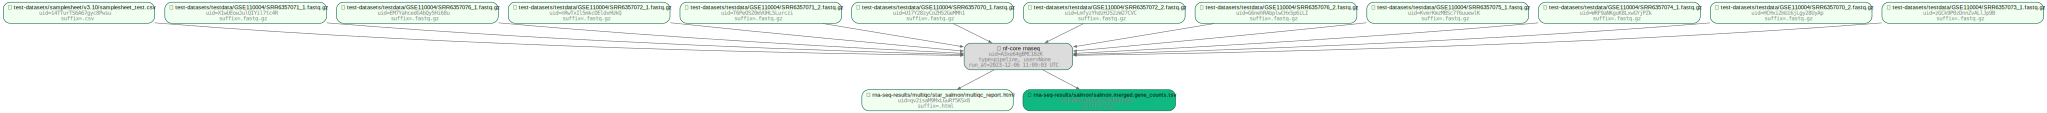

In [12]:
count_matrix.view_flow()

View the database content:

In [13]:
ln.view()

File


,uid,storage_id,key,suffix,accessor,description,version,size,hash,hash_type,transform_id,run_id,initial_version_id,visibility,key_is_virtual,updated_at,created_by_id
id,,,,,,,,,,,,,,,,,
14,MMLLAnPZeLjEmJ68bJVB,1,rna-seq-results/salmon/salmon.merged.gene_coun...,.tsv,None,None,None,3838,af4b1GaLBBdvP3L8cdb7CQ,md5,1.0,1.0,None,0,False,2023-12-06 11:23:06.463741+00:00,1
13,qv2isaM9MxLGuRf5KSx8,1,rna-seq-results/multiqc/star_salmon/multiqc_re...,.html,None,None,None,1573341,EiwB3o2YlPtHZL5vhbrsqg,md5,1.0,1.0,None,0,False,2023-12-06 11:23:06.421060+00:00,1
12,zGCk9P0zDnnZvALlJp9B,1,test-datasets/testdata/GSE110004/SRR6357073_1....,.fastq.gz,None,None,None,2253497,B3tTegMt6wglWBeFvfHI7g,md5,NaN,NaN,None,0,False,2023-12-06 11:09:03.772956+00:00,1
11,HCHxiZmUi6jLgy28UyAp,1,test-datasets/testdata/GSE110004/SRR6357070_2....,.fastq.gz,None,None,None,2232117,0SbMZu0Wn2mvLAfaDdc-Ag,md5,NaN,NaN,None,0,False,2023-12-06 11:09:03.772636+00:00,1
10,WRF9aNKguK8LxwGYjPZk,1,test-datasets/testdata/GSE110004/SRR6357074_1....,.fastq.gz,None,None,None,2289662,n2UX-ubh4ChzsZ85nPsKZQ,md5,NaN,NaN,None,0,False,2023-12-06 11:09:03.772316+00:00,1
9,KvmrKmzMBSc7f6uuewlK,1,test-datasets/testdata/GSE110004/SRR6357075_1....,.fastq.gz,None,None,None,2207238,ak4u6Oo56bYwTqkEtWcJYA,md5,NaN,NaN,None,0,False,2023-12-06 11:09:03.771984+00:00,1
8,G6nehRAbplwCHx5p6iLI,1,test-datasets/testdata/GSE110004/SRR6357076_2....,.fastq.gz,None,None,None,2250281,ADd-doz9AF-4VW0X_S7iOQ,md5,NaN,NaN,None,0,False,2023-12-06 11:09:03.771627+00:00,1


Run


,uid,transform_id,run_at,created_by_id,report_id,is_consecutive,reference,reference_type
id,,,,,,,,
1,Bcs8m6VxzFM42qhCD4VF,1,2023-12-06 11:09:03.865886+00:00,1,None,None,b187d9dc-7074-4da5-91f1-d5abe704614b\n76fbcdf1...,nextflow_id


Storage


,uid,root,type,region,updated_at,created_by_id
id,,,,,,
1,pfjurGAu,/home/zeth/PycharmProjects/nextflow-lamin-usec...,local,None,2023-12-06 11:09:01.212047+00:00,1


Transform


,uid,name,short_name,version,type,latest_report_id,source_file_id,reference,reference_type,initial_version_id,updated_at,created_by_id
id,,,,,,,,,,,,
1,A3xe64gBMC18zK,nf-core rnaseq,None,3.11.2,pipeline,None,None,https://github.com/laminlabs/nextflow-lamin-us...,None,None,2023-12-06 11:09:03.810901+00:00,1


User


,uid,handle,name,updated_at
id,,,,
1,I5DPZdiE,zethson,None,2023-12-06 11:09:01.191310+00:00


Clean up the test instance:

In [14]:
!lamin delete --force nextflow-bulkrna

💡 deleting instance zethson/nextflow-bulkrna
✅     deleted instance settings file: /home/zeth/.lamin/instance--zethson--nextflow-bulkrna.env
❗ You are running 3.11.5
Only python versions 3.8~3.10 are currently tested, use at your own risk.
✅     instance cache deleted
✅     deleted '.lndb' sqlite file
❗     consider manually deleting your stored data: /home/zeth/PycharmProjects/nextflow-lamin-usecases/docs
